# ML-Challenge - EURO2024

In [42]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Load data

In [43]:
# Teams = pd.read_csv('data/Country_players.csv') # teams composition
# E24 = pd.read_csv('data/Euro_24.csv') # programme matchs de poule
# EHist = pd.read_csv('data/Euros_Data.csv') # historical Data of EUROS
# Players = pd.read_csv('data/male_players.csv') # FIFA individual players attribute
HISTORY = pd.read_csv('data/Matches Data.csv') # historical Data of ALL international matches

In [44]:
print(HISTORY.info())
print(HISTORY.head())
print(HISTORY.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3952 non-null   int64  
 1   Unnamed: 0    3952 non-null   int64  
 2   home_team     3952 non-null   object 
 3   away_team     3952 non-null   object 
 4   home_score    3916 non-null   float64
 5   away_score    3916 non-null   float64
 6   tournament    3952 non-null   object 
 7   city          3952 non-null   object 
 8   country       3952 non-null   object 
 9   neutral       3952 non-null   bool   
 10  winner        3916 non-null   object 
 11  year          3952 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 343.6+ KB
None
   Unnamed: 0.1  Unnamed: 0 home_team away_team  home_score  away_score  \
0             0           0  Scotland   England         0.0         0.0   
1             1           1   England  Scotland         4.0    

In [45]:
HISTORY.drop(columns='Unnamed: 0', inplace=True)

Unnamed: 0.1     0
home_team        0
away_team        0
home_score      36
away_score      36
tournament       0
city             0
country          0
neutral          0
winner          36
year             0
dtype: int64


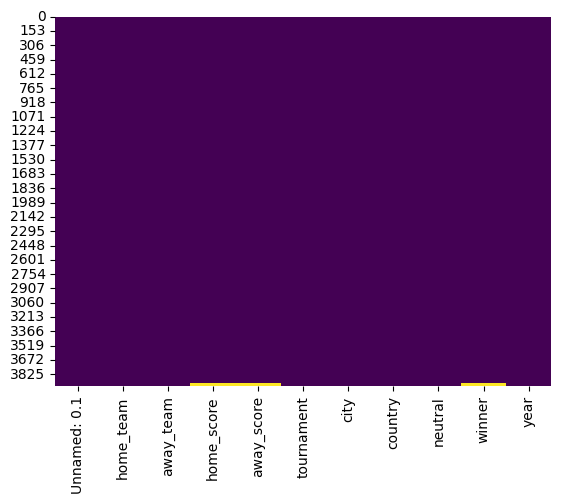

In [46]:
print(HISTORY.isna().sum()) # nb of NAs (or isnull())
# print(HISTORY[HISTORY.isnull().any(axis=1)]) # shows rows with at least one missing value
sns.heatmap(HISTORY.isna(), cbar=False, cmap='viridis'); # Visualize missing values... 

In [47]:
HISTORY_clean = HISTORY.dropna()

print(HISTORY_clean.isna().sum())


Unnamed: 0.1    0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
city            0
country         0
neutral         0
winner          0
year            0
dtype: int64


In [48]:
# our target is not "winner" but an "encoded winner", where its Home or Away (or False).
HISTORY_clean["Winner_HoAw"] = HISTORY_clean.apply(lambda row: 'Home' if row['winner'] == row['home_team']  else ('Away' if row['winner'] == row['away_team'] else 'Draw'), axis=1)
HISTORY_clean.insert(HISTORY_clean.columns.get_loc('winner') + 1, 'Winner_HoAw', HISTORY_clean.pop('Winner_HoAw'))
HISTORY_clean

,Unnamed: 0.1,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,Winner_HoAw,year
0,0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,Draw,1872
1,1,England,Scotland,4.0,2.0,Friendly,London,England,False,England,Home,1873
2,2,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,Home,1874
3,3,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,Draw,1875
4,4,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,Home,1876
...,...,...,...,...,...,...,...,...,...,...,...,...
3911,12187,Italy,Turkey,0.0,0.0,Friendly,Bologna,Italy,False,Draw,Draw,2024
3912,12203,Poland,Ukraine,3.0,1.0,Friendly,Warsaw,Poland,False,Poland,Home,2024
3913,12209,Portugal,Croatia,1.0,2.0,Friendly,Oeiras,Portugal,False,Croatia,Away,2024
3914,12213,Switzerland,Austria,1.0,1.0,Friendly,Sankt Gallen,Switzerland,False,Draw,Draw,2024


# add power rankings


In [49]:
POWER = pd.read_csv('data/final_power_rankings.csv') 
POWER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     24 non-null     object 
 1   Rank                        24 non-null     int64  
 2   EM 2024 Org Power Rankings  24 non-null     int64  
 3   power_ranking_3             24 non-null     int64  
 4   average_ranking             24 non-null     float64
 5   adjusted_rank               24 non-null     int64  
 6   scaled_adjusted_rank        24 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


In [50]:
POWER.sort_values(by='Country')

,Country,Rank,EM 2024 Org Power Rankings,power_ranking_3,average_ranking,adjusted_rank,scaled_adjusted_rank
22,Albania,23,23,23,23.000000,2,-1.476115
10,Austria,8,14,13,11.666667,14,0.231199
3,Belgium,3,7,2,4.000000,21,1.227131
8,Croatia,9,9,8,8.666667,16,0.515751
15,Czech Republic,16,19,17,17.333333,8,-0.622458
9,Denmark,11,10,11,10.666667,15,0.373475
1,England,4,2,3,3.000000,23,1.511684
0,France,1,1,1,1.000000,24,1.653960
23,Georgia,24,24,24,24.000000,1,-1.618391
5,Germany,5,3,9,5.666667,19,0.942579


In [51]:
# Merge POWER DataFrame with HISTORY DataFrame on home_team
HISTORY_clean = HISTORY_clean.merge(POWER[['Country', 'scaled_adjusted_rank']],
                              left_on='home_team', right_on='Country', how='left')
HISTORY_clean = HISTORY_clean.rename(columns={'scaled_adjusted_rank': 'Strength_Home_2024'})

# Merge POWER DataFrame with HISTORY DataFrame on away_team
HISTORY_clean = HISTORY_clean.merge(POWER[['Country', 'scaled_adjusted_rank']],
                              left_on='away_team', right_on='Country', how='left')
HISTORY_clean = HISTORY_clean.rename(columns={'scaled_adjusted_rank': 'Strength_Away_2024'})

# Drop the extra 'Country' columns from the merges
HISTORY_clean = HISTORY_clean.drop(columns=['Country_x', 'Country_y'])

In [52]:
HISTORY_clean

,Unnamed: 0.1,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,Winner_HoAw,year,Strength_Home_2024,Strength_Away_2024
0,0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,Draw,1872,-0.907010,1.511684
1,1,England,Scotland,4.0,2.0,Friendly,London,England,False,England,Home,1873,1.511684,-0.907010
2,2,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,Home,1874,-0.907010,1.511684
3,3,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,Draw,1875,1.511684,-0.907010
4,4,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,Home,1876,-0.907010,1.511684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,12187,Italy,Turkey,0.0,0.0,Friendly,Bologna,Italy,False,Draw,Draw,2024,0.658027,-0.337906
3912,12203,Poland,Ukraine,3.0,1.0,Friendly,Warsaw,Poland,False,Poland,Home,2024,-0.907010,-0.195630
3913,12209,Portugal,Croatia,1.0,2.0,Friendly,Oeiras,Portugal,False,Croatia,Away,2024,1.369407,0.515751
3914,12213,Switzerland,Austria,1.0,1.0,Friendly,Sankt Gallen,Switzerland,False,Draw,Draw,2024,0.088923,0.231199


In [53]:
# select data only from 2016 on:
HISTORY_clean_recent = HISTORY_clean[HISTORY_clean['year']>=2016]
print(HISTORY_clean_recent.info())

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 3409 to 3915
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        507 non-null    int64  
 1   home_team           507 non-null    object 
 2   away_team           507 non-null    object 
 3   home_score          507 non-null    float64
 4   away_score          507 non-null    float64
 5   tournament          507 non-null    object 
 6   city                507 non-null    object 
 7   country             507 non-null    object 
 8   neutral             507 non-null    bool   
 9   winner              507 non-null    object 
 10  Winner_HoAw         507 non-null    object 
 11  year                507 non-null    int64  
 12  Strength_Home_2024  507 non-null    float64
 13  Strength_Away_2024  507 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 55.9+ KB
None


In [54]:
print(HISTORY_clean_recent['Strength_Away_2024'])

3409   -0.622458
3410   -0.907010
3411    1.084855
3412    1.653960
3413   -1.476115
          ...   
3911   -0.337906
3912   -0.195630
3913    0.515751
3914    0.231199
3915   -0.337906
Name: Strength_Away_2024, Length: 507, dtype: float64


In [55]:
HISTORY_clean_recent['tournament'].unique()

array(['Friendly', 'UEFA Euro', 'FIFA World Cup qualification',
       'FIFA World Cup', 'UEFA Nations League', 'UEFA Euro qualification'],
      dtype=object)

# Lots of power data is missing¨!

In [56]:
print(HISTORY_clean_recent.isna().sum()) # lots of data is missing !

Unnamed: 0.1          0
home_team             0
away_team             0
home_score            0
away_score            0
tournament            0
city                  0
country               0
neutral               0
winner                0
Winner_HoAw           0
year                  0
Strength_Home_2024    0
Strength_Away_2024    0
dtype: int64


In [57]:
HISTORY_clean_recent.dropna(inplace=True)
HISTORY_clean_recent.info()
# only 507 entries left !!!

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 3409 to 3915
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        507 non-null    int64  
 1   home_team           507 non-null    object 
 2   away_team           507 non-null    object 
 3   home_score          507 non-null    float64
 4   away_score          507 non-null    float64
 5   tournament          507 non-null    object 
 6   city                507 non-null    object 
 7   country             507 non-null    object 
 8   neutral             507 non-null    bool   
 9   winner              507 non-null    object 
 10  Winner_HoAw         507 non-null    object 
 11  year                507 non-null    int64  
 12  Strength_Home_2024  507 non-null    float64
 13  Strength_Away_2024  507 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 55.9+ KB


# TRAin test split

In [36]:
# Split data into features and target variable

X = HISTORY_clean_recent.drop(columns=['Winner_HoAw', 'home_score', 'away_score', 'winner'], axis=1)
Y = HISTORY_clean_recent['Winner_HoAw']

# Split data into training and testing sets, classically 80/20 for classification
from sklearn.model_selection import train_test_split
# stratify = both train and test have the same distributions of the dependent variable, here y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (405, 9)
Size of test set: (102, 9)


In [37]:
# Check if train-test split has returned balanced data sets
print('TRAIN DATA:\n',Y_train.value_counts(normalize=True))
print('\nTEST DATA:\n', Y_test.value_counts(normalize=True))


TRAIN DATA:
 Winner_HoAw
Home    0.424691
Away    0.298765
Draw    0.276543
Name: proportion, dtype: float64

TEST DATA:
 Winner_HoAw
Home    0.431373
Away    0.294118
Draw    0.274510
Name: proportion, dtype: float64


In [38]:
X_train.head()

,home_team,away_team,tournament,city,country,neutral,year,Strength_Home_2024,Strength_Away_2024
12097,England,Italy,UEFA Euro qualification,London,England,False,2023,1.511684,0.658027
12014,Slovenia,Denmark,UEFA Euro qualification,Ljubljana,Slovenia,False,2023,-1.333838,0.373475
11450,Hungary,Turkey,UEFA Nations League,Budapest,Hungary,False,2020,-0.053354,-0.337906
11207,Slovenia,Poland,UEFA Euro qualification,Ljubljana,Slovenia,False,2019,-1.333838,-0.907010
12151,Netherlands,Scotland,Friendly,Amsterdam,Netherlands,False,2024,0.800303,-0.907010


In [39]:
X_train[X_train.isnull().any(axis=1)]

,home_team,away_team,tournament,city,country,neutral,year,Strength_Home_2024,Strength_Away_2024


In [40]:
Y_train.head()

12097    Home
12014    Draw
11450    Home
11207    Home
12151    Home
Name: Winner_HoAw, dtype: object

In [41]:
import h2o
from h2o.automl import H2OAutoML
# Start the H2O cluster (locally)
h2o.init() ## starts the python interprter to run the code on a JAVA server

ModuleNotFoundError: No module named 'h2o'

In [ ]:
data_train = pd.concat([X_train, Y_train], axis = 1)
data_train = h2o.H2OFrame.from_python(data_train)  # needed since internal data structure = JAVA
data_train['Winner_HoAw'] = data_train['Winner_HoAw'].asfactor() # same here: price mus be declared as category.
data_train.head()

In [ ]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins ; usually do not use max as 10 mins!
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=42) # random state
aml.train(x=X_train.columns.tolist(), y=Y_train['Winner_HoAw'].name, training_frame=data_train)  # here, x and y are not the data, btu the columns names !

In [ ]:
# View the AutoML Leaderboard
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)
# logloss = cross-entropy loss function
# aucpr = AUC precsion recall
# model = StackedEnsemble = complicated model  of several models averaged.

In [5]:
for col in list(E_recent.columns)[:10]:
    print('\n---------------',E_recent[col].value_counts())


--------------- home_team
Italy                  8
England                7
Portugal               6
France                 6
Germany                6
Croatia                5
Belgium                5
Ukraine                5
Wales                  5
Czechia                4
Spain                  4
Switzerland            4
Hungary                4
Sweden                 4
Poland                 3
Russia                 3
Türki̇ye               3
Netherlands            3
Slovakia               2
Romania                2
Iceland                2
Austria                2
Finland                2
Denmark                2
Northern Ireland       1
Republic of Ireland    1
Albania                1
North Macedonia        1
Scotland               1
Name: count, dtype: int64

--------------- away_team
Spain                  6
France                 5
Belgium                5
Portugal               5
Slovakia               5
Switzerland            5
Wales                  5
Poland              

In [10]:
for home in E_recent['home_team'].unique()[:2]:
    print('\n-------------\n',E_recent[E_recent['home_team']==home].iloc[:, :10].value_counts())


-------------
 home_team  away_team  home_score_total  away_score_total  winner    winner_reason      year  round            stadium_city   stadium_name           
Portugal   Austria    0.0               0.0               False     DRAW               2016  GROUP_STANDINGS  Paris          Parc des Princes           1
           France     1.0               0.0               Portugal  WIN_ON_EXTRA_TIME  2016  FINAL            Saint-Denis    Stade de France            1
                      2.0               2.0               False     DRAW               2020  GROUP_STANDINGS  Budapest       Puskás Aréna               1
           Germany    2.0               4.0               Germany   WIN_REGULAR        2020  GROUP_STANDINGS  Munich         Munich Football Arena      1
           Iceland    1.0               1.0               False     DRAW               2016  GROUP_STANDINGS  Saint-Etienne  Stade Geoffroy Guichard    1
           Wales      2.0               0.0               Portuga

In [7]:
E_recent['home_team'].unique()

array(['Portugal', 'Germany', 'France', 'Wales', 'Poland', 'England',
       'Italy', 'Hungary', 'Croatia', 'Switzerland', 'Sweden', 'Iceland',
       'Czechia', 'Northern Ireland', 'Ukraine', 'Slovakia', 'Russia',
       'Romania', 'Belgium', 'Spain', 'Austria', 'Republic of Ireland',
       'Türki̇ye', 'Albania', 'Netherlands', 'Finland', 'North Macedonia',
       'Denmark', 'Scotland'], dtype=object)